# Решение задачи кредитного скоринга

В этом задании мы будем работать с данными клиентов банка. В отличие от задания с домами Бостона, данные в этой задаче не сразу готовы для построения модели, и нам потребуется предварительно посмотреть на данные и предобработать их.

Значение признаков:
* account: банковский счет (-1: отриц. баланс, 0: нет счета, 1: до 200 ед., 2: более 200 ед.)
* duration: на какой период запрашивают кредит
* credit_history: рейтинг по кредитной истории (от 0 - отличная кр. история до 4 - критическая ситуация с кредитами)
* amount: на какую сумму запрашивают кредит
* savings: сберегательный счет (0: нет, 1: < 100, 2: 100 <= ... < 500, 3: 500 <= ... < 1000, 4:  >= 1000)
* employment: срок работы на текущей позиции (0: не работает, 1: до 1 года, 2: от 1 до 4 лет, 3: от 4 до 7 лет, 4: более 7 лет)
* guarantors: 1 - есть поручители, 0 - нет
* residence:  сколько лет резидент
* age: возраст, деленный на 100
* credits_number: число кредитов
* job: 0: не работает, 1: неквалифицированный, 2: квалифицированный специалист, 3: высокая должность или бизнес
* maintenance_people: число людей, которых обеспечивает заемщик
* telephone: указан ли телефон (1: да, 0: нет)
* foreign: 1: иностранец, 0: нет
* real_estate: 1: есть недвижимость, 0: нет недвижимости
* life_insurance: 1: оформлено страхование жизни, 0, нет страховки
* car: 1: есть автомобиль, 0: нет автомобиля
* housing_rent: 1: платит за съем жилья, 0: не платит за съем жилья
* sex: пол - 1: муж., 0: жен.
* purpose: на какую цель запрашивают кредит (из нескольких вариантов)
* target: 1: кредит выдан, 0: в кредите отказано

Требуется решить задачу предсказания значения в последнем столбце, то есть задачу бинарной классификации.

По описанию данных понятно, что все признаки числовые (включая вещественные, порядковые, бинарные), кроме предпоследнего, который является категориальным.

### 1. Загрузка, визуализация и предварительный анализ данных

Для данных кредитного скоринга нам понадобится выполнить больше предобработки данных, используя некоторое количество команд, которые мы ранее не разбирали. Эти команды не понадобятся в части для самостоятельной работы.

Используем модуль pandas и его функцию read_excel для загрузки данных:

In [ ]:
# эта ячейка устанавливает необходимые библиотеки (модули)
!pip install pandas
!pip install xlrd
!pip install sklearn
!pip install openpyxl

In [1]:
import pandas as pd
%matplotlib inline 
# служебная команда для графиков

In [2]:
tab = pd.read_excel("https://github.com/nadiinchi/intro_sklearn/raw/master/scoring.xlsx")

/Users/nadiinchi/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Посмотрим на первые 10 строк с помощью функции head:

In [3]:
tab.head(10)

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,1311.0,2,2,1,4,34.0,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,1552.0,1,3,1,1,31.0,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,451.0,1,3,1,4,21.0,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,4036.0,0,1,1,3,25.0,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,909.5,1,2,1,4,37.0,1,...,1,1,1,0,0,0,0,1,education,0
5,1,0.24,3,1032.0,1,0,1,2,34.0,1,...,1,1,1,0,1,0,0,0,furniture,0
6,1,0.09,4,750.5,1,4,1,3,34.0,2,...,1,1,1,0,0,1,0,0,education,0
7,-1,0.12,2,450.0,0,2,1,2,23.0,1,...,1,0,1,0,0,1,0,1,car_new,0
8,1,0.36,3,4043.0,2,4,1,4,42.0,4,...,1,1,1,0,0,1,0,1,car_new,0
9,-1,0.42,3,2185.0,1,3,1,2,26.0,2,...,2,1,1,0,1,0,0,1,television,0


По строкам - объекты (клиенты), по столбцам - признаки, последний столбец - целевая переменная (1 - кредит выдан, 0 - в кредите отказано).

Сколько объектов и признаков?

In [4]:
tab.shape

(600, 21)

Посмотрим, сколько кредитов выдано и не выдано:

In [5]:
class_counts = tab["target"].value_counts()
class_counts

1    300
0    300
Name: target, dtype: int64

<AxesSubplot:title={'center':'Число выданных и не выданных кредитов'}>

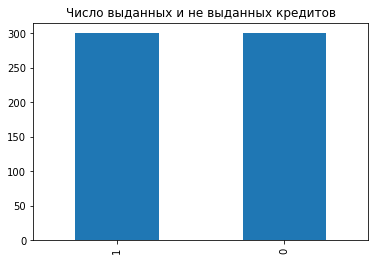

In [6]:
class_counts.plot(kind='bar', title="Число выданных и не выданных кредитов")

Посмотрим общие статистики по данным:

In [7]:
tab.describe()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,job,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,target
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.083333,0.218783,2.410000,1735.245833,1.200000,2.348333,0.901667,2.831667,35.181667,1.366667,1.906667,1.150000,0.391667,0.965000,0.268333,0.205000,0.343333,0.186667,0.691667,0.500000
std,0.915306,0.127492,1.098747,1545.026093,0.924531,1.208069,0.298013,1.103945,11.416182,0.565174,0.662334,0.357369,0.488530,0.183933,0.443462,0.404038,0.475218,0.389969,0.462190,0.500417
min,-1.000000,0.040000,0.000000,125.000000,0.000000,0.000000,0.000000,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.120000,2.000000,681.625000,1.000000,2.000000,1.000000,2.000000,26.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.180000,2.000000,1173.500000,1.000000,2.000000,1.000000,3.000000,33.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,1.000000,0.270000,4.000000,2159.375000,1.000000,3.000000,1.000000,4.000000,41.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,2.000000,0.720000,4.000000,9212.000000,4.000000,4.000000,1.000000,4.000000,75.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
tab["purpose"].value_counts()

car_new                157
television             143
furniture              118
business                61
car_used                57
education               31
repairs                 13
others                  10
domestic_appliances      8
retraining               2
Name: purpose, dtype: int64

In [12]:
tab.corr()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,job,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,target
account,1.000000,-0.021734,0.039010,0.022817,0.114423,-0.051962,0.030091,-0.116617,0.004300,-2.043889e-02,-0.011933,-0.053589,0.061292,0.017353,0.047641,-0.059814,-0.008316,-0.057684,0.005591,9.840981e-02
duration,-0.021734,1.000000,-0.071038,0.607561,-0.057135,0.068117,-0.033033,0.069949,0.000003,-7.468182e-03,0.229175,0.001814,0.169292,0.143413,-0.280934,-0.038578,0.089020,-0.029674,0.086834,-2.340667e-01
credit_history,0.039010,-0.071038,1.000000,-0.058133,-0.008546,0.122389,-0.019425,0.037726,0.142850,3.382004e-01,0.006790,-0.003826,0.073556,-0.052786,0.089048,-0.050504,-0.020655,-0.112679,0.065255,2.216491e-01
amount,0.022817,0.607561,-0.058133,1.000000,-0.120914,0.011029,-0.040311,0.043801,0.075588,3.771122e-02,0.322497,-0.028460,0.310595,0.034814,-0.275248,0.000624,0.044790,-0.029900,0.083584,-1.514619e-01
savings,0.114423,-0.057135,-0.008546,-0.120914,1.000000,0.012257,0.059380,-0.001309,-0.023536,3.194991e-03,-0.053981,-0.025264,-0.044355,0.031415,0.019545,-0.002682,-0.012159,0.012039,-0.003907,6.495191e-02
employment,-0.051962,0.068117,0.122389,0.011029,0.012257,1.000000,-0.029902,0.256846,0.281200,9.136588e-02,0.155453,0.114654,0.076776,0.039932,-0.046998,-0.084976,0.003616,-0.113444,0.222575,1.477417e-01
guarantors,0.030091,-0.033033,-0.019425,-0.040311,0.059380,-0.029902,1.000000,0.015570,0.038627,-1.354622e-02,0.021088,0.029000,0.058577,0.058933,-0.115817,-0.012548,0.097331,-0.085999,0.009797,-1.679178e-02
residence,-0.116617,0.069949,0.037726,0.043801,-0.001309,0.256846,0.015570,1.000000,0.262859,1.097945e-01,0.026425,0.051414,0.113167,0.020267,-0.136058,-0.031047,-0.036034,0.193326,-0.042999,-1.662096e-02
age,0.004300,0.000003,0.142850,0.075588,-0.023536,0.281200,0.038627,0.262859,1.000000,1.477515e-01,0.046624,0.125481,0.192866,-0.006507,0.007832,-0.036318,-0.173686,-0.216501,0.216924,1.068089e-01
credits_number,-0.020439,-0.007468,0.338200,0.037711,0.003195,0.091366,-0.013546,0.109794,0.147751,1.000000e+00,0.011298,0.099187,0.113875,-0.036937,0.006439,-0.044596,0.033980,-0.015654,0.082018,-2.916280e-17


In [10]:
# как заполнять пропуски
# col = tab["account"]
# col.fillna(col.mean()|)

* Есть ли пропуски в данных?
* Все ли признаки одного масштаба?

Посмотрим на гистограммы признаков:

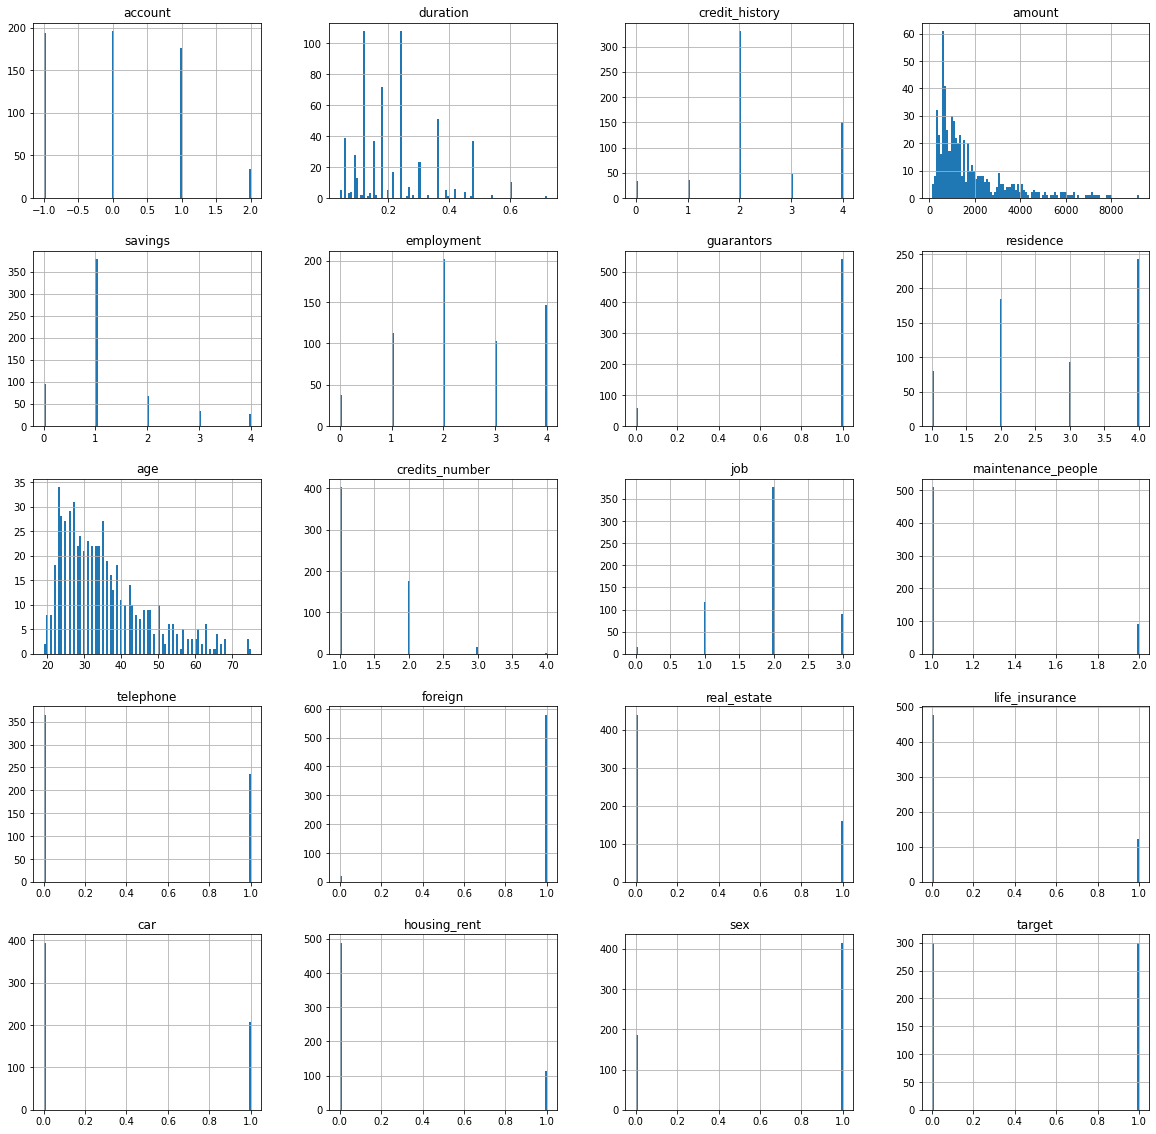

In [14]:
smth = tab.hist(figsize=(20, 20), bins=100)

In [ ]:
import numpy as np # np.log
tab["log_amount"] = tab["amount"].apply(np.log)
#tab["log_amount"] = np.log(tab["amount"])
# tab.drop("amount", axis=1, inplace=True)

* Признаки каких типов присутствуют в данных (вещественные, порядковые, категориальные, бинарные)?
* Есть ли в данных ненужные признаки (например, всегда равные одному значению)?

### 2. Подготовка данных

Выделим отдельно признаки и целевую переменную. Для первого этапа работы исключим категориальный признак "цель кредита", поэтому при создании X удалим последние два столбца.

In [16]:
X = tab[tab.columns[:-2]]
y = tab["target"]

В предыдущем разделе мы увидели, что признаки имеют разный масштаб. Это помешает нам интерпретировать веса линейной модели, а также может усложнить обучение. Поэтому мы приведем признаки в один масштаб. Воспользуемся библиотекой sklearn:

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [19]:
X[:3]

array([[0.66666667, 0.20588235, 0.5       , 0.13051612, 0.5       ,
        0.5       , 1.        , 1.        , 0.26785714, 0.        ,
        0.66666667, 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        ],
       [0.        , 0.20588235, 0.        , 0.15703753, 0.25      ,
        0.75      , 1.        , 0.        , 0.21428571, 0.        ,
        0.66666667, 0.        , 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        ],
       [0.        , 0.11764706, 0.5       , 0.03587543, 0.25      ,
        0.75      , 1.        , 1.        , 0.03571429, 0.        ,
        0.66666667, 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 1.        ]])

Теперь значения во всех столбцах от 0 до 1!

### Задания для самостоятельной работы

Теперь мы готовы к тому, чтобы повторить шаги, которые мы выполняли в задании с домами Бостона: разделение данных на обучение и контроль, построение и анализ модели.

При выполнении заданий используйте примеры кода из задания про дома Бостона, а также [__таблицу с подсказками__](https://github.com/nadiinchi/intro_sklearn/blob/master/Cheatsheet.pdf).

Обязательно выполните все предыдущие ячейки. Для этого нажмите на эту ячейку, затем выберите в меню Cell -> Run all above.

#### Задача 1. Разделение данных на обучение и контроль

Используйте функцию train_test_split, чтобы разделить выборку X, y на обучение и контроль. Задайте test_size = 0.3, а также укажите аргумент random_state=1 (он понадобится нам в дальнейшем). 

Пример: train_test_split( .... test_size=0.3, random_state=1)

In [20]:
from sklearn.model_selection import train_test_split
# функция для разделения выборки на обучающую и тестовую

In [23]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, \
                                          random_state=1)

### 3. Обучение  модели

#### Задача 2.  Обучение линейной модели

Обучите линейную модель на обучающих данных. Используйте LogisticRegression, импортированную в следующей ячейке.

In [21]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()
model.fit(X_tr, y_tr)

LogisticRegression()

In [25]:
model.coef_

array([[ 0.51090127, -1.52724752,  1.41497712, -0.66595291,  0.62723695,
         1.01922854, -0.18735329, -0.13296921,  0.31604073, -0.99554121,
        -0.42792484, -0.17049767,  0.32591214, -0.84017261,  0.77837466,
         0.42996615,  0.65884106, -0.26306536,  0.37101116]])

In [26]:
model.intercept_

array([-0.80851262])

### 4. Получение предсказаний

#### Задача 3. Предсказания линейной модели

Выполните предсказания линейной модели на обучающей и тестовой выборказ.

In [27]:
preds_tr = model.predict(X_tr)
preds_te = model.predict(X_te)

In [30]:
preds_te[:10]

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [31]:
y_te[:10]

446    0
404    0
509    0
455    0
201    1
23     0
415    0
548    0
66     0
165    0
Name: target, dtype: int64

### 5. Оценивание качества модели

#### Задача 4. Качество линейной модели

Оцените качество линейной модели на обучающей и тестовой выборках. Воспользуемся метрикой accuracy и импортируем функцию accuracy_score. Эту функцию нужно использовать точно так же, как функцию mean_absolute_error из предыдущего задания, однако она оценивает качество классификации, а не регрессии. 

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_tr, preds_tr)

0.6952380952380952

In [35]:
accuracy_score(y_te, preds_te)

0.6722222222222223

Какое базовое решение? (бейзлайн)

Никому не выдавать кредиты - константное предсказание 0 (50% accuracy)

### 6. Анализ модели

Выведем таблицу со столбцами "название признака" и "вес признака", отсортированную по значениям весов. Логичны ли вклады признаков?

In [36]:
weights_data = {"веса":model.coef_[0],\
                "признаки": tab.columns[:-2]}
weights = pd.DataFrame(weights_data)
weights.sort_values("веса")

,веса,признаки
1,-1.527248,duration
9,-0.995541,credits_number
13,-0.840173,foreign
3,-0.665953,amount
10,-0.427925,job
17,-0.263065,housing_rent
6,-0.187353,guarantors
11,-0.170498,maintenance_people
7,-0.132969,residence
8,0.316041,age


### 7. Улучшение модели

В самом начале работы мы исключили из данных категориальный признак "цель кредита". Давайте вернем его в наши данные и посмотрим, повысится ли качество модели, если мы грамотно обработаем этот признак. На лекции вы разобрали кодирование категориальных признаков, когда вместо одного категориального признака создают несколько бинарных, и у каждого объекта - только одна 1, остальные 0. Вернемся назад и выполним такое кодирование для наших данных. Для этого в модуле pandas функция get_dummies:

In [37]:
tab_ohe = pd.get_dummies(tab, "purpose")

In [38]:
tab_ohe.head()
# one-hot encoding

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,purpose_business,purpose_car_new,purpose_car_used,purpose_domestic_appliances,purpose_education,purpose_furniture,purpose_others,purpose_repairs,purpose_retraining,purpose_television
0,1,0.18,2,1311.0,2,2,1,4,34.0,1,...,1,0,0,0,0,0,0,0,0,0
1,-1,0.18,0,1552.0,1,3,1,1,31.0,1,...,1,0,0,0,0,0,0,0,0,0
2,-1,0.12,2,451.0,1,3,1,4,21.0,1,...,0,0,0,0,0,0,0,0,1,0
3,-1,0.30,0,4036.0,0,1,1,3,25.0,3,...,1,0,0,0,0,0,0,0,0,0
4,0,0.36,2,909.5,1,2,1,4,37.0,1,...,0,0,0,0,1,0,0,0,0,0


В правой части данных появилось много 0 и 1.

Теперь повторяем все те же шаги, чтобы получить выборки:

In [39]:
X_ohe = tab_ohe.drop("target", axis=1)
y = tab_ohe["target"]
scaler = MinMaxScaler()
X_ohe = scaler.fit_transform(X_ohe)
X_tr_ohe, X_te_ohe, y_tr, y_te  = train_test_split(X_ohe, y, \
                                             test_size=0.3, random_state=1)

Благодаря фиксации random_state=1 мы получаем одно и то же разделение.

#### Задача 5. Линейная модель с категориальным признаком

Повторите шаги задач 2-4 для новых данных: обучите линейную модель, выполните предсказания на обучающей и контрольной выборках и оцените качество (accuracy). Повысилось ли качество по сравнению с предыдущей моделью?

In [ ]:
# X_tr_ohe, X_te_ohe, y_tr, y_te

In [44]:
model = LogisticRegression()
model.fit(X_tr_ohe, y_tr)
preds_tr = model.predict(X_tr_ohe)
preds_te = model.predict(X_te_ohe)
print("Train:", accuracy_score(y_tr, preds_tr))
print("Test:", accuracy_score(y_te, preds_te))

Train: 0.7238095238095238
Test: 0.6666666666666666


А что, если мы просто пронумеруем категории вместо "умного" кодирования? Для этого воспользуемся классом LabelEncoder:

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tab["purpose"] = le.fit_transform(tab["purpose"])
X_le = tab[tab.columns[:-1]]
scaler = MinMaxScaler()
X_le = scaler.fit_transform(X_le)
X_tr_le, X_te_le, y_tr, y_te  = train_test_split(X_le, y, \
                                                     test_size=0.3,\
                                                     random_state=1)

#### Задача 6. Линейная модель с категориальным признаком - 2

Повторите шаги задач 2-4 для новых данных: обучите линейную модель, выполните предсказания на обучающей и контрольной выборках и оцените качество (accuracy). Изменилось ли качество по сравнению с двумя предыдущими моделями?

In [47]:
# X_tr_le, X_te_le, y_tr, y_te

model = LogisticRegression()
model.fit(X_tr_le, y_tr)
preds_tr = model.predict(X_tr_le)
preds_te = model.predict(X_te_le)
print("Train:", accuracy_score(y_tr, preds_tr))
print("Test:", accuracy_score(y_te, preds_te))

Train: 0.7
Test: 0.6722222222222223


#### Summary

* Разведочный анализ: 
    * смотрим фрагмент данных (какие типы признаков?), 
    * смотрим статистики (пропуски?масштаб признаков?странности?), 
    * визуализируем данные (хотя бы гистограммы: есть ли редкие категории или значения? как трансформировать признаки?)
* Предобработка - стандартные шаги:
    * Заполнение пропусков
    * Нормировка (масштабирование)
    * Кодирование категориальных признаков (one-hot encoding)
    * Трансформация признаков (например, применение логарифма)
* Повышение качества модели - стандартные шаги:
    * Хорошо подготовить данные, найти ошибки в данных
    * Выбрать подходящие признаки, правильно обработать все признаки
    * Подбор гиперпараметров

#### Задача 7. Подбор гиперпараметров

Чтобы улучшить качество, можно попробовать другие значения гиперпараметров. Будем использовать исходные данные X, y для простоты (без категориального признака).

Ключевой гиперпараметр логистической регрессии - коэффициент регуляризации C: LogisticRegression(C=...). Попробуйте значения от 0.001 до 1000, выберите лучшее значение с точки зрения каечства на тестовой выборке. Как и в задании с домами Бостона, можно выполнять упрощенную версию с копированием кода или усложненную версию с циклом. 

#### Задача 8. Подбор гиперпараметров с помощью кросс-валидации

До этого момента мы всегда подбирали гиперпараметры (например,  С), ориентируясь на качество на тестовой выборке. При этом мы снова можем переобучиться: выбрать то C, которое хорошо подходит для конкретной тестовой выборки, при этом алгоритм с выбранным C может плохо работать на новых данных. Чтобы более честно подобрать C, нужно делать кросс-валидацию: разбивать выборку на обучение и контроль несколько раз, для каждого разбиения оценивать тестовое качество (качество на контроле), и в конце усреднять тестовое качество по разбиениям. Для проведения этой операции в sklearn есть функция cross_val_score. Она принимает на вход следующие аргументы:
1. модель;
1. данные X;
1. правильные ответы y.

Функция возвращает список полученных значений качества для разных разбиений.

Воспользуйтесь функцией cross_val_score и подберите гиперпараметр С с помощью кросс-валидации. Как и ранее, выполните цикл по C, создайте переменную-модель с текущим C, далее вызовите функцию кросс-валидации и выведите среднее качество.

Усреднять значения в списке можно с помощью функции numpy.mean(...).

In [40]:
from sklearn.model_selection import cross_val_score
import numpy

In [43]:
for log_C in range(-3, 4):
    C = 10**log_C
    model = LogisticRegression(C=C)
    qual = cross_val_score(model, X, y)
    print("C =", C, "Acc:", numpy.mean(qual))
    print(qual)

C = 0.001 Acc: 0.6249999999999999
[0.55833333 0.6        0.65       0.65833333 0.65833333]
C = 0.01 Acc: 0.6366666666666666
[0.56666667 0.625      0.66666667 0.66666667 0.65833333]
C = 0.1 Acc: 0.645
[0.625      0.60833333 0.65833333 0.7        0.63333333]
C = 1 Acc: 0.6649999999999999
[0.63333333 0.65       0.65833333 0.71666667 0.66666667]
C = 10 Acc: 0.6716666666666666
[0.64166667 0.65833333 0.675      0.71666667 0.66666667]
C = 100 Acc: 0.6716666666666666
[0.63333333 0.65833333 0.675      0.70833333 0.68333333]
C = 1000 Acc: 0.6716666666666666
[0.63333333 0.65833333 0.675      0.70833333 0.68333333]
